In [1]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import xarray as xr

%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [2]:
filename = '/Users/gabrielm/Desktop/DATA-LASP/cmo_dmin.nc'

dataset = nc.Dataset(filename)



In [3]:
print(dataset)

# University of Alaska Fairbanks

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Source_of_Data: United States Geological Survey (USGS)
    Station_Name: College
    IAGA_CODE: CMO
    Latitude: 64.8742
    Longitude: -147.8597
    Elevation: 197
    Sensor_Orientation: HDZF
    Digital_Sampling: 100.0 second
    Data_Interval_Type: filtered 1-minute (00:15-01:45)
    Data_Type: Definitive
    url: https://geomag.usgs.gov/monitoring/observatories/college
    file_conversion_author: Greg Lucas (glucas@usgs.gov)
    dimensions(sizes): Time(21565440)
    variables(dimensions): int64 Time(Time), float64 X(Time), float64 Y(Time), float64 Z(Time)
    groups: 


In [4]:
print(dataset.__dict__)


{'Source_of_Data': 'United States Geological Survey (USGS)', 'Station_Name': 'College', 'IAGA_CODE': 'CMO', 'Latitude': 64.8742, 'Longitude': -147.8597, 'Elevation': 197, 'Sensor_Orientation': 'HDZF', 'Digital_Sampling': '100.0 second', 'Data_Interval_Type': 'filtered 1-minute (00:15-01:45)', 'Data_Type': 'Definitive', 'url': 'https://geomag.usgs.gov/monitoring/observatories/college', 'file_conversion_author': 'Greg Lucas (glucas@usgs.gov)'}


In [5]:
for dim in dataset.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'Time', size = 21565440


In [6]:
for var in dataset.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int64 Time(Time)
    units: minutes since 1976-01-01 00:00:00
    calendar: proleptic_gregorian
unlimited dimensions: Time
current shape = (21565440,)
filling on, default _FillValue of -9223372036854775806 used
<class 'netCDF4._netCDF4.Variable'>
float64 X(Time)
    _FillValue: nan
    description: X-component (Geographic North) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (21565440,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Y(Time)
    _FillValue: nan
    description: Y-component (Geographic East) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (21565440,)
filling on
<class 'netCDF4._netCDF4.Variable'>
float64 Z(Time)
    _FillValue: nan
    description: Z-component (Geographic Down [-r]) of the magnetic field
    units: nT
unlimited dimensions: Time
current shape = (21565440,)
filling on


In [7]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)


In [8]:
# taking NaNs out?

x = df['X']

x = x[~np.isnan(x)]

df.dropna()



,Time,X,Y,Z
0,1976-01-01 00:00:00,11473.481146,6198.944377,55353.0
1,1976-01-01 00:01:00,11473.661461,6198.610625,55353.0
2,1976-01-01 00:02:00,11474.541276,6199.085942,55353.0
3,1976-01-01 00:03:00,11472.421034,6198.802757,55353.0
4,1976-01-01 00:04:00,11472.601345,6198.469035,55354.0
...,...,...,...,...
21565435,2016-12-31 23:55:00,11958.800000,3853.300000,55306.5
21565436,2016-12-31 23:56:00,11960.800000,3860.100000,55308.1
21565437,2016-12-31 23:57:00,11955.600000,3861.100000,55311.4
21565438,2016-12-31 23:58:00,11952.900000,3860.700000,55312.7


In [9]:


df.head(20)

## Looks like there are several NaN in this data set



,Time,X,Y,Z
0,1976-01-01 00:00:00,11473.481146,6198.944377,55353.0
1,1976-01-01 00:01:00,11473.661461,6198.610625,55353.0
2,1976-01-01 00:02:00,11474.541276,6199.085942,55353.0
3,1976-01-01 00:03:00,11472.421034,6198.802757,55353.0
4,1976-01-01 00:04:00,11472.601345,6198.469035,55354.0
5,1976-01-01 00:05:00,11473.841766,6198.276867,55354.0
6,1976-01-01 00:06:00,11471.901832,6197.659991,55355.0
7,1976-01-01 00:07:00,11471.360940,6198.661079,55356.0
8,1976-01-01 00:08:00,11472.060383,6199.470184,55356.0
9,1976-01-01 00:09:00,11471.880043,6199.803891,55357.0


In [10]:
df.tail(20)

,Time,X,Y,Z
21565420,2016-12-31 23:40:00,11954.4,3861.0,55316.3
21565421,2016-12-31 23:41:00,11959.1,3861.4,55315.8
21565422,2016-12-31 23:42:00,11960.3,3858.4,55313.6
21565423,2016-12-31 23:43:00,11963.2,3855.9,55310.4
21565424,2016-12-31 23:44:00,11968.1,3859.7,55310.6
21565425,2016-12-31 23:45:00,11967.9,3863.1,55310.2
21565426,2016-12-31 23:46:00,11964.6,3863.9,55311.1
21565427,2016-12-31 23:47:00,11962.1,3863.0,55312.5
21565428,2016-12-31 23:48:00,11961.7,3859.6,55310.5
21565429,2016-12-31 23:49:00,11969.3,3861.6,55308.5


Text(0, 0.5, 'X-component of magnetic field')

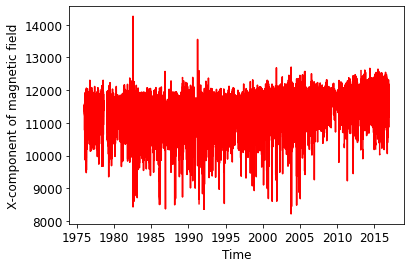

In [14]:
#plot of all data

plt.plot(df['Time'], df['X'], label='data', color='red')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

# Gaps between 1975-1980

In [12]:
df['Time_Diff'] = df['Time'].diff()
df['Time_Diff'].max()


Timedelta('0 days 00:01:00')

In [13]:
# Print the number of nans in each column
for col in df.columns.to_list():
    print(col, df[col].isna().sum())

# More Z data? 

Time 0
X 928052
Y 928052
Z 933471
Time_Diff 1


In [16]:
df_1977 = df[df['Time'] < pd.Timestamp(1977, 12, 31)]
inds_1977 = list(pd.isnull(df_1977['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1977 = len(inds_1977) # number of NaNs in the X component
print(inds_len_1977)

4424


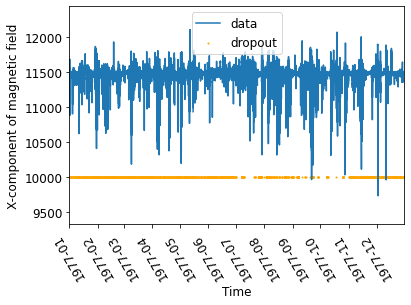

In [17]:
# Plot the 1977 data
plt.plot(df_1977['Time'], df_1977['X'], label='data')
plt.xlabel('Time')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 10000 is just so it displays at the bottom.
plt.scatter(df_1977['Time'][inds_1977], [10000]*inds_len_1977, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(1977, 1, 1), datetime.date(1977, 12, 31)])
plt.xticks(rotation=120)
plt.legend()

In [19]:
df_1977_y = df[df['Time'] < pd.Timestamp(1977, 12, 31)]
inds_1977_y = list(pd.isnull(df_1977_y['Y']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1977_y = len(inds_1977_y) # number of NaNs in the Y component
print(inds_len_1977_y)

4424


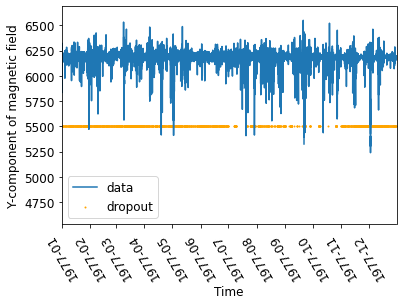

In [21]:
# Plot the 1977 data
plt.plot(df_1977_y['Time'], df_1977_y['Y'], label='data')
plt.xlabel('Time')
plt.ylabel('Y-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 5500 is just so it displays at the bottom.
plt.scatter(df_1977_y['Time'][inds_1977_y], [5500]*inds_len_1977_y, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(1977, 1, 1), datetime.date(1977, 12, 31)])
plt.xticks(rotation=120)
plt.legend()

Text(0, 0.5, 'Z-component of magnetic field')

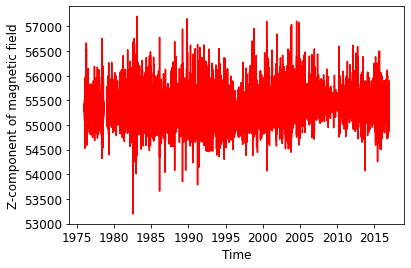

In [24]:
plt.plot(df['Time'], df['Z'], label='data', color='red')
plt.xlabel('Time')
plt.ylabel('Z-component of magnetic field')

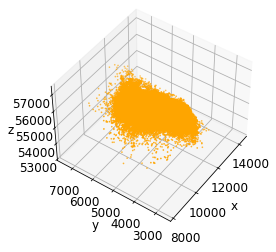

In [42]:
# Create 3D figure

ax = plt.axes(projection='3d')
ax.scatter3D(x, y, z, s=.5, c='orange')

x = df['X']
y = df['Y']
z = df['Z']

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(45, 215)




In [ ]:
# How can I make the variables different colors? 
